In [1]:
import pandas as pd
import numpy as np
from opentelemetry.sdk.metrics import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
X = df.drop(['Species', "Id"], axis=1)
y = df['Species']

In [12]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape[0]

120

In [62]:
def diff_power(x1, x2):
    return np.power(x1 - x2, 2)

def Euclidian_distance(X_train, x1, x2, x3, x4):
    dist_list = []
    dist_label = []
    for i in range(X_train.shape[0]):
        vect = X_train.iloc[i, :].values
        d1 = diff_power(vect[0], x1)
        d2 = diff_power(vect[1], x2)
        d3 = diff_power(vect[2], x3)
        d4 = diff_power(vect[3], x4)
        dist = np.sqrt(d1 + d2 + d3 + d4)
        dist_list.append(dist)
        dist_label.append(y_train[i])
    return dist_label, dist_list


def K_Nearest_Neighbors(X_train, vect, k=3):
    dist_label, dist_list = Euclidian_distance(X_train, vect[0], vect[1], vect[2], vect[3])
    df = pd.DataFrame({'Distance': dist_list, 'label': dist_label})
    df_sorted = df.sort_values(by='Distance')
    #print(df_sorted)
    nearest_labels = df_sorted['label'].head(k)
    nb = Counter(nearest_labels)
    most_common_label, count = nb.most_common(1)[0]

    return most_common_label


In [64]:
pred = []
for i in range(X_test.shape[0]):
    pred.append(K_Nearest_Neighbors(X_train, vect=X_test.iloc[i, :], k=3))

accuracy_score(pred, y_test)*100

C:\Users\Sikandar\AppData\Local\Temp\ipykernel_15660\3717751531.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dist_label, dist_list = Euclidian_distance(X_train, vect[0], vect[1], vect[2], vect[3])


100.0

In [65]:

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")


KNN Accuracy: 1.00


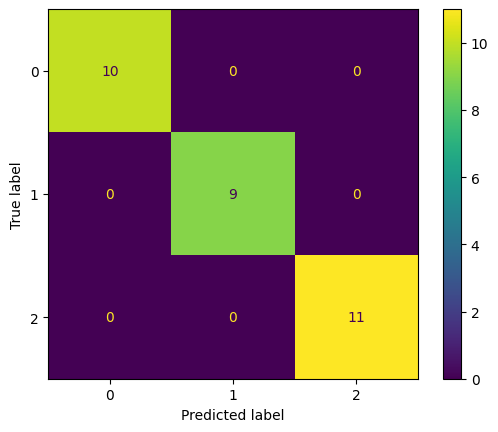

In [69]:
cm = confusion_matrix(y_test, pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()

In [70]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y are your data and labels
# Make sure X is 2D and y is 1D

# Example of 2D data (for visualization)
# If you have more than two features, use PCA or select two features for visualization
X = X_train.iloc[:, :2].values  # Select the first two features of X_train
y = y_train  # Assuming y_train is the target labels for the data

# Create and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, y)

# Plot the decision regions
plot_decision_regions(X=X, y=y, clf=knn_model, legend=2)

# Set axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'mlxtend'